# Bag of Words and TF-IDF
Below, we'll look at three useful methods of vectorizing text.
- `CountVectorizer` - Bag of Words
- `TfidfTransformer` - TF-IDF values
- `TfidfVectorizer` - Bag of Words AND TF-IDF values

Let's first use an example from earlier and apply the text processing steps we saw in this lesson.

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ch0125\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ch0125\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ch0125\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
corpus = ["The first time you see The Second Renaissance it may look boring.",
        "Look at it at least twice and definitely watch part 2.",
        "It will change your view of the matrix.",
        "Are the human people the ones who started the war?",
        "Is AI a bad thing ?"]

In [4]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

Use the skills you learned so far to create a function `tokenize` that takes in a string of text and applies the following:
- case normalization (convert to all lowercase)
- punctuation removal
- tokenization, lemmatization, and stop word removal using `nltk`

Feel free to refer back to previous sections to complete these steps!

In [5]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^\w]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

# `CountVectorizer` (Bag of Words)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize count vectorizer object
vect = CountVectorizer(tokenizer=tokenize)

In [7]:
# get counts of each token (word) in text data
X = vect.fit_transform(corpus)

In [8]:
# convert sparse matrix to numpy array to view
X.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0]], dtype=int64)

In [9]:
# view token vocabulary and counts
vect.vocabulary_

{'first': 6,
 'time': 20,
 'see': 17,
 'second': 16,
 'renaissance': 15,
 'may': 11,
 'look': 9,
 'boring': 3,
 'least': 8,
 'twice': 21,
 'definitely': 5,
 'watch': 24,
 'part': 13,
 '2': 0,
 'change': 4,
 'view': 22,
 'matrix': 10,
 'human': 7,
 'people': 14,
 'one': 12,
 'started': 18,
 'war': 23,
 'ai': 1,
 'bad': 2,
 'thing': 19}

In [10]:
import pandas as pd

# why not visualize this a little more convenient
pd.DataFrame(X.toarray(), columns=vect.vocabulary_.keys())

,first,time,see,second,renaissance,may,look,boring,least,twice,...,view,matrix,human,people,one,started,war,ai,bad,thing
0,0,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# `TfidfTransformer`

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)

In [12]:
# use counts from count vectorizer results to compute tf-idf values
tfidf = transformer.fit_transform(X)

In [13]:
# convert sparse matrix to numpy array to view
tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.36419547, 0.        ,
        0.        , 0.36419547, 0.        , 0.        , 0.26745392,
        0.        , 0.36419547, 0.        , 0.        , 0.        ,
        0.36419547, 0.36419547, 0.36419547, 0.        , 0.        ,
        0.36419547, 0.        , 0.        , 0.        , 0.        ],
       [0.39105193, 0.        , 0.        , 0.        , 0.        ,
        0.39105193, 0.        , 0.        , 0.39105193, 0.28717648,
        0.        , 0.        , 0.        , 0.39105193, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39105193, 0.        , 0.        , 0.39105193],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.57735027, 0.

# `TfidfVectorizer`
`TfidfVectorizer` = `CountVectorizer` + `TfidfTransformer`

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize tf-idf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

In [15]:
# compute bag of word counts and tf-idf values
X = vectorizer.fit_transform(corpus)

In [16]:
# convert sparse matrix to numpy array to view
X.toarray()

array([[0.        , 0.        , 0.46369322, 0.        , 0.        ,
        0.        , 0.37410477, 0.        , 0.        , 0.        ,
        0.46369322, 0.46369322, 0.        , 0.        , 0.46369322,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.52335825,
        0.        , 0.42224214, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.52335825, 0.        , 0.        , 0.52335825],
       [0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4472136 , 0.        , 0.        , 0.4472136 , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.        , 0.        ,
        0.   

In [17]:
tfidf_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf_matrix

,ai,bad,boring,change,definitely,human,look,matrix,ones,people,renaissance,second,started,thing,time,twice,view,war,watch
0,0.00000,0.00000,0.463693,0.00000,0.000000,0.000000,0.374105,0.00000,0.000000,0.000000,0.463693,0.463693,0.000000,0.00000,0.463693,0.000000,0.00000,0.000000,0.000000
1,0.00000,0.00000,0.000000,0.00000,0.523358,0.000000,0.422242,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.523358,0.00000,0.000000,0.523358
2,0.00000,0.00000,0.000000,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.57735,0.000000,0.000000
3,0.00000,0.00000,0.000000,0.00000,0.000000,0.447214,0.000000,0.00000,0.447214,0.447214,0.000000,0.000000,0.447214,0.00000,0.000000,0.000000,0.00000,0.447214,0.000000
4,0.57735,0.57735,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.00000,0.000000,0.000000


Text(120.5, 0.5, 'documents')

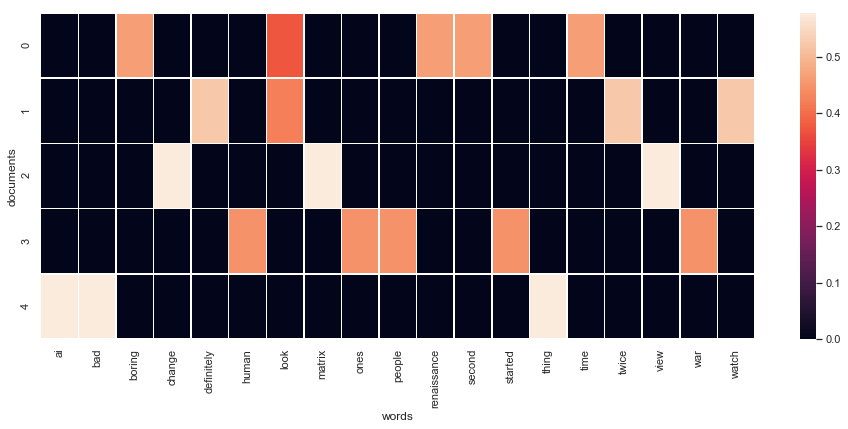

In [19]:
import seaborn as sns
sns.set()

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,6

ax = sns.heatmap(tfidf_matrix, linewidths=.5)
ax.set_xlabel('words')
ax.set_ylabel('documents')